In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:/Data/height.csv')

In [3]:
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<AxesSubplot:xlabel='Height'>

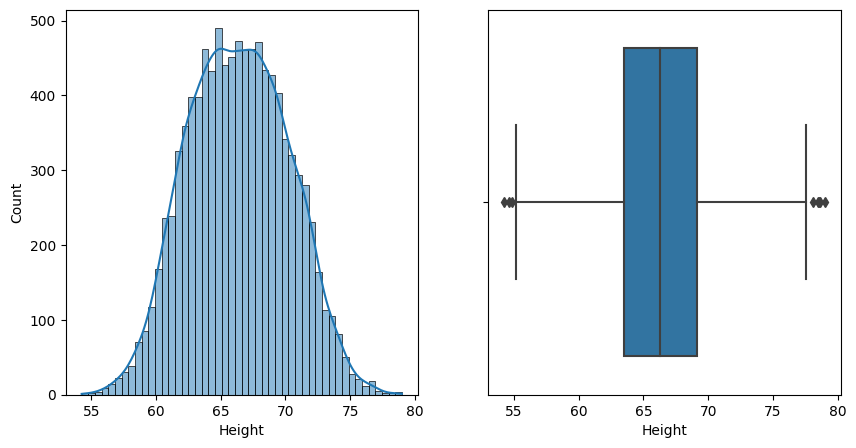

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Height'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=df['Height'])

In [5]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)

In [6]:
upper_limit

74.7857900592

In [7]:
lower_limit

58.134411587100004

In [8]:
df[(df['Height']>upper_limit) |(df['Height']<lower_limit)]

,Gender,Height
23,Male,75.205974
190,Male,76.709835
197,Male,75.944460
202,Male,75.140821
215,Male,74.795375
...,...,...
9761,Female,56.975279
9825,Female,55.979198
9895,Female,57.740192
9904,Female,57.028857


In [15]:
df0=df[(df['Height']<upper_limit) &(df['Height']>lower_limit)]

<AxesSubplot:xlabel='Height'>

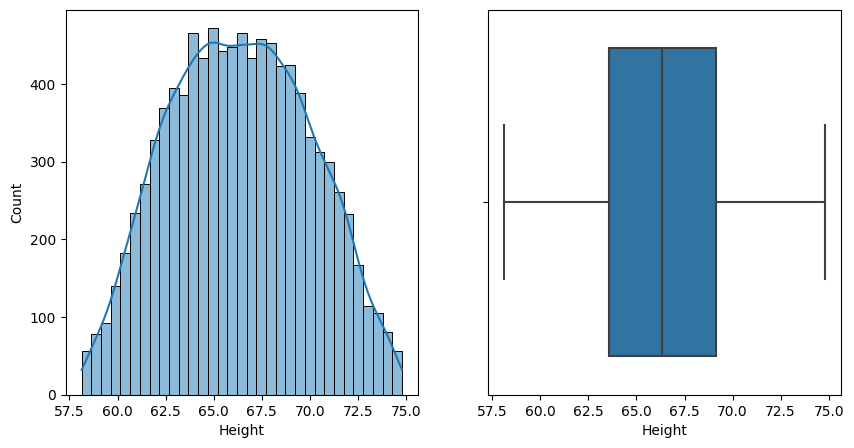

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df0['Height'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=df0['Height'])

# Capping

In [10]:
df1=df.copy()

In [11]:
df1['Height']=np.where(
    df1['Height']>upper_limit,
    upper_limit,
    np.where(
    df1['Height']<lower_limit,
        lower_limit,
        df1['Height']
    
    )
)

In [12]:
df1

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<AxesSubplot:xlabel='Height'>

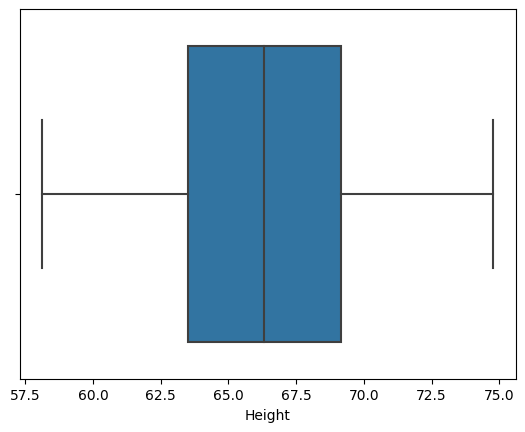

In [13]:
sns.boxplot(x=df1['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

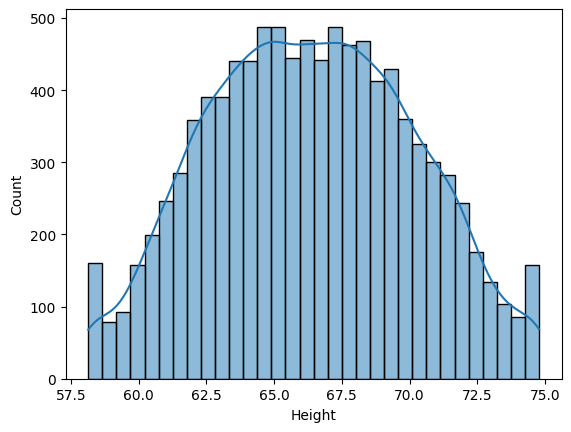

In [19]:
sns.histplot(df1['Height'],kde=True)